# Основы Scikit-learn и обучения моделей МО



Вспомним общую схему решения задачи машинного обучения:

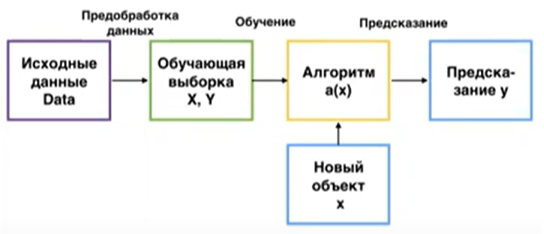

Из исходной базы данных после предобработки мы получаем обучающую выборку $X, Y$. Матрица объекты-признаки $X$ имеет размер (число объектов $\ell$) $\times$ (число признаков $d$). Одна строка этой матрицы соответствует одному объекту обучающей выборки, заданному как вектор длины $d$ (число признаков). Признаки - числовые характеристики объекта. Вектор правильных ответов $Y$ имеет длину $\ell$ (число объектов). 

На этапе обучения на основе обучающей выборки $X, Y$ строится (обучается) алгоритм $a(x)$. Это некая функция, которая берет на вход признаки объекта и возвращает предсказание для этого объекта: $y \approx a(x)$. Алгоритм $a$ может делать предсказания для любых допустимых объектов; его можно применять как к обучающим объектам, так и к тем, которых алгоритм никогда не видел. В этом и состоит цель машинного обучения: выявить такие закономерности в обучающей выборке, которые позволят делать качественные (довольно точные) предсказания на новых объектах $x$. 

Тому, как обучать такие алгоритмы $a(x)$ по обучающей выборке, во многом и посвящен наш курс.

## Введение

Scikit-Learn, или коротко Sklearn - библиотека, в которой реализованы практически все используемые сегодня **алгоритмы машинного обучения**, а также **функции обработки (подготовки) данных** (стандартизация, нормализация, различные другие преобразования), а также **методы для работы с моделями** (кросс-валидация, подбор гиперпараметров, метрики оценки качества).

_Официальная документация:_ https://scikit-learn.org/stable/

Scikit-learn **содержит**:
* **Алгоритмы классификации**:
 * Линейные модели, например, логистическая регрессия, Ridge;
 * Метод опорных векторов SVM (Support Vector Machine);
 * Метод k-ближайших соседей (k–neighbors);
 * Случайный лес (Random Forest);
 * Деревья решений (Decision Trees);
 * Наивный байесовский классификатор (NaiveBayes);
 * Линейный дискриминантный анализ (Linear Discriminant Analysis);
 * Нейронные сети(Neural network);
* **Алгоритмы регрессии**:
 * Линейные модели, например, линейная регрессия, Lasso, Elastic-netи многие другие [3];
 * Метод опорных векторов SVM (Support Vector Machine);
 * Метод k-ближайших соседей (k–neighbors);
 * Ансамблевые методы, например, AdaBoost, Gradient Tree Boosting, Stacked Generalizationи многие другие [4];
 * Случайный лес (Random Forest);
 * Деревья решений (Decision Trees);
 * Нейронные сети(Neural network).
* **Алгоритмы кластеризации**:
 * Метод k-средних k–Means;
 * Спектральная кластеризация (Spectral clustering);
 * Сдвиг среднего значения (Meanshift);
 * Метод распространения близости (Affinitypropagation);
 * Метод Варда(Ward hierarchical clustering);
 * Агломеративные методы (Agglomerative clustering);
 * Основанная на плотности пространственная кластеризация для приложений с шумами DBSCAN;
 * Сбалансированное итеративное сокращение и кластеризация с помощью иерархий BIRCH.
* **Методы уменьшения размерностей**:
 * Метод главных компонент PCA;
 * Латентное размещение Дирихле LDA;
 * Факторный анализ(Factor analysis).
* **Обработка данных**:
 * Стандартизация и нормализация данных, например, StandardScaller, MinMaxScaller;
 * Нелинейные преобразования, например, отображение на равномерное распределение (QuantileTransform) и нормальное распределение 
 * Преобразование категориальных данных в числовые, например, OrdinalEncoder, OneHotEncoder;
 * Преобразование непрерывных данных в дискретные (Discretization);
 * Заполнения пустых значений, например, PolynomialFeatures;
 * Векторизация, например, DictVectorizer, CountVectorizer, TfIdftransformer;
* **Работа с моделями**:
 * Кросс-валидация (cross validation);
 * Настройка гиперпараметров, например,GridSearchCV;
 * Метрики для оценки модели;
 * Сохранение моделей;
 * Валидация моделей, например, Validation curve, Learning curve.

**Установка через pip:** `pip install scikit-learn`

**Установка через conda:**`conda install -c conda-forge scikit-learn`


### Интерфейс scikit-learn

Нам необходимо познакомиться с интерфейсом библиотеки, чтобы понимать, как ее можно использовать на практике. Чаще всего используют готовые реализации из sklearn, но иногда может потребоваться самим реализовать алгоритмы в том же духе, в котором это сделано в этой библиотеке (с тем же интерфейсом).

Для реализации алгоритмов машинного обучения в sklearn всегда используется один интерфейс - класс с функциями **fit(X, Y)** для обучения модели по обучающей выборке **$X, Y$** и **predict(X)** для возвращения предсказаний на выборке **$X$**

При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.

### План 

- Предобработка данных при помощи scikit-learn
    - заполнение пропусков
    - <обработка выбросов>
    - перевод категориальных признаков в числовые
    - масштабирование признаков

In [5]:
import numpy as np
import pandas as pd

*Немного об обучении моделей*. В арсенале дата-саентиста кроме `pandas` и `matplotlib` должны быть библиотеки, позволяющие обучать модели. Для простых моделей (линейные модели, решающее дерево, ...) отлично подходит `sklearn`: в нем очень понятный и простой интерфейс. Несмотря на то, что в `sklearn` есть реализация бустинга и простых нейронных сетей, ими все же не пользуются и предпочитают специализированные библиотеки: `XGBoost`, `LightGBM` и пр. для градиентного бустинга над деревьями, `PyTorch`, `Tensorflow` и пр. для нейронных сетей. Сегодня для наглядной реализации рассмотрим алгоритм из `sklearn`.

## Загрузка данных


Мы можем загружать данные (датасеты, datasets) полученные извне, например, из **txt, csv, json файлов и т.д.** с помощью **Pandas**:

Помимо алгоритмов обучения и предсказания для разных методов, в sklearn реализовано много вспомогательного функционала для предобработки данных, визуализации данных, вычисления метрик качества и т. д. В ходе следующих семинаров мы постепенно познакомимся с этим функционалом библиотеки.

Сегодня мы познакомимся с методами предобработки данных и их реализацией в sklearn. Для демонстраций загрузим набор данных тиитаника. В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

Кроме того, **Scikit-learn предоставляет несколько наборов данных "из коробки"**, подходящих для изучения и тестирования моделей (ирисы Фишера, бостонские дома, вино и т.д).

Например, функция sklearn.datasets.load_boston () отображает данные о ценах на дома в районе Бостона. Есть 20640 наблюдений, а входная матрица имеет 8 столбцов (признаков):

In [41]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_california, y_california = housing["data"], housing["target"]

print('X:')
display(X_california[:3])
print('Y:')
display(y_california[:3])

X:


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])

Y:


array([4.526, 3.585, 3.521])

In [42]:
X_california.shape

(20640, 8)

## Разделение данных на обучающую и тестовую выборку

Разделение данных на обучающую и тестировую выборку является важной частью проверки того, насколько хорошо работает модель. Изначально она обучается на отдельных данных (обучающей выборке), а замет проверяем качество работы модели на тестовой выборке. Таким образом, можно измерить способность модели обобщать новые данные:

In [48]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает выбору случайныи образом на 2 подвыборки: обучающую и тестовую
# запускам разбиение с параметрами по умолчанию
x_train, x_test, y_train, y_test = train_test_split(X_california, y_california) 

SEED = 1
# Кроме того, мы можем явно задать некоторые специальные параметры
x_train, x_test, y_train, y_test = train_test_split(X_california, y_california, test_size=0.33, random_state=SEED) 

_test_size, train_size_ - необязательные параметры, отвечающие за количество данных в %, которые пойдут в обучающую или тестовую выборки.

_random_state_ - отвечает за перемешивание данных. Туда передают какое-либо целочисленное занчение, чтобы при каждом запуске выборка была запущена с одинаковыми индексами, т.е. данный параметр задает начальную инициализацию рандома, чтобы была ровно та же последовательность вызовов всего что, связано с рандомом в общем случае, если где-то еще потребуется передать его явно. Это гарантирует воспроизводимость эксперемента.

Кроме этого у функции _train_test_split_ есть ещё несколько параметров по умолчанию (см. документацию).

In [49]:
import os
import random

SEED = 1

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
seed_everything(SEED)

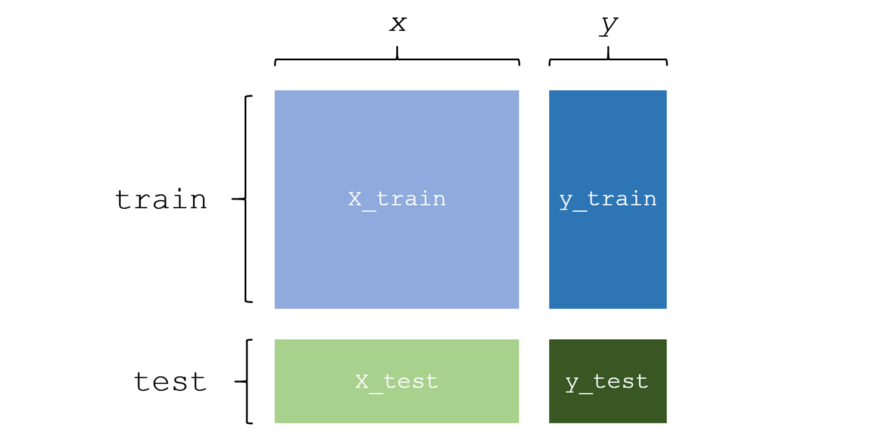

**Будем работаться с одним из самых часто используемых для наглядного и понятного пояснения данные Титаник**

In [2]:
import pandas as pd

In [5]:
pd.set_option('display.max_rows', 10)

In [9]:
X_raw = pd.read_csv("./titanic_train.csv")
X_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
X_raw.shape

(891, 12)

In [11]:
X_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
              ... 
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Length: 12, dtype: int64

In [12]:
# pd.set_option('display.max_rows', 891)
X_raw.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Предобработка данных

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Для заполнения константами можно использовать метод датафрейма fillna, для замены средними — класс `impute.SimpleImputer`.

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
# категориальные признаки имеют тип "object"
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns
)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,,S
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,,S


In [54]:
X_no_mis.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
              ..
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
Length: 12, dtype: int64

In [217]:
pd.set_option('display.max.rows', 15)
X_no_mis.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
dtype: int64

In [65]:
X_no_mis_cat = X_no_mis.drop(columns=['Name', 'PassengerId', 'Survived', 'Ticket'])
X_no_mis_cat.shape

(891, 8)

In [66]:
y = X_no_mis['Survived']

In [218]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

Всегда нужно анализировать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

__Пример:__ предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

### Перевод категориальных признаков в числовые
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать с помощью классов LabelEncoder + OneHotEncoding, но проще использовать функцию `pd.get_dummies`.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр `OneHotEncoder(sparse = True)` или `.get_dummies(sparse=True)`, и метод вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

In [219]:
X_no_mis_cat

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3.0,22.000000,1.0,0.0,7.2500,male,,S
1,1.0,38.000000,1.0,0.0,71.2833,female,C85,C
2,3.0,26.000000,0.0,0.0,7.9250,female,,S
3,1.0,35.000000,1.0,0.0,53.1000,female,C123,S
4,3.0,35.000000,0.0,0.0,8.0500,male,,S
...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,male,,S
887,1.0,19.000000,0.0,0.0,30.0000,female,B42,S
888,3.0,29.699118,1.0,2.0,23.4500,female,,S
889,1.0,26.000000,0.0,0.0,30.0000,male,C148,C


In [68]:
print(f"Shape before encoding: {X_no_mis_cat.shape}")
X_dum = pd.get_dummies(X_no_mis_cat, drop_first=True)
X_dum

Shape before encoding: (891, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.000000,1.0,0.0,7.2500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,38.000000,1.0,0.0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,26.000000,0.0,0.0,7.9250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,35.000000,1.0,0.0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,35.000000,0.0,0.0,8.0500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.0,19.000000,0.0,0.0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3.0,29.699118,1.0,2.0,23.4500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1.0,26.000000,0.0,0.0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
X_dum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Cabin_A10',
       'Cabin_A14', 'Cabin_A16', 'Cabin_A19',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=156)

## Масштабирование

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно для численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел). Кроме того, у каждого метода машинного обучения есть свои особенности, требующие масштабирования признаков. Например, для линейных моделей - это ускорение обучения и повышение интерпретируемости модели.

Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в sklearn). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в sklearn).

Стандартизация – техника преобразования значений признака (Feature), адаптирующая признаки с разными диапазонами значений. Подразумевает приравнивание среднего значения к нулю и/или приравнивание стандартного отклонения к единице. Данный вид шкалирования стремится привести данные к нормальному распределению. 

Другими словами. Стандартизированные данные содержат ту же информацию, но имеют среднее значение 0 и отклонение 1. После масштабирования данных математическая природа алгоритмов позволяет лучше с ними работать (например SVM и метод K-means).

In [71]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Нормализация (Normalization)

В машинном обучении нормализацией называют метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения. 

Предположим, у вас есть набор данных с различными единицами: температура в Кельвинах, относительная влажность и день года. Мы можем увидеть следующие диапазоны для каждой функции.
Температура: от 270 K до 305 K
Влажность: от 0 до 1 (т. е. Влажность 30%, равная 0,3)
День года: от 0 до 365

Когда вы смотрите на эти значения, вы интуитивно нормализуете значения. Например, вы знаете, что увеличение на 0,5 (на 50%) для влажности намного более значимо, чем увеличение на 0,5 для температуры. И если мы не будем нормализовать эти данные, наш алгоритм может научиться использовать температуру в качестве основного предиктора просто потому, что масштаб является наибольшим (и, следовательно, изменения в значениях температуры наиболее значительны для алгоритма). Нормализация данных позволяет всем признакам вносить одинаковый вклад (или, что более точно, позволяет добавлять признаки в зависимости от их важности, а не их масштаба).

Нормализацию требуют, например, алгоритмы логистическая регрессия, нейронные сети, PCA.

In [74]:
from sklearn.preprocessing import Normalizer

data = [[178, 500000, 58], [130, 5000, 110], [190, 100000000, 90]] # запись о людях (рост, зарплата, вес)

scaler = Normalizer().fit(data)
normalized_data = scaler.transform(data)

print('До нормализации:')
print(data[:3])
print()
print('После нормализации:')
normalized_data[:3] # теперь нет гигантской разницы в признаках, как 58 и 100000000

До нормализации:
[[178, 500000, 58], [130, 5000, 110], [190, 100000000, 90]]

После нормализации:


array([[3.55999975e-04, 9.99999930e-01, 1.15999992e-04],
       [2.59849331e-02, 9.99420504e-01, 2.19872511e-02],
       [1.90000000e-06, 1.00000000e+00, 9.00000000e-07]])

#### Пример реализации

Реализуем класс для нормализации данных по аналогии с интерфейсом sklearn для нормализации.

Предобработка данных в sklearn реализована по похожему шаблону, что и обучение моделей: функция `.fit(X)` запоминает внутренние переменные, а функция `.transform(X)` выполняет преобразование выборки. y здесь не нужен, потому что в нормализации целевые переменные не участвуют (как и почти во всей предобработке данных).

Параметров у класса нет, так что функцию `__init__` мы пропускаем. Функция `.fit()` считает статистики - среднееи стандартное отклонение каждого признака (по обучающей выборке), а функция `.tranform()` вычитает среднее и делит на стандартное отклонение. Для вычисления статистик используем numpy.

In [75]:
class Normalizer:
    def fit(self, X: np.array) -> None:
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)

    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]

**Вопрос**: верно ли?

In [84]:
normalizer = preprocessing.MinMaxScaler()
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)

In [ ]:
X = ...
normalizer = preprocessing.MinMaxScaler()
normalizer.fit(X)
X = normalizer.transform(X)
X_train, X_test = train_test_split...

In [ ]:
X_train, X_test = train_test_split...
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

Создаем случайные данные X и y для тестирования нашего класса:

In [77]:
num_obj_train = 20
num_obj_te = 10
num_feat = 4
X_train = np.random.randint(-5, 5, size=(num_obj_train, num_feat))
X_train.shape

(20, 4)

In [78]:
X_test = np.random.randint(-5, 5, size=(num_obj_te, num_feat))
X_test.shape

(10, 4)

In [79]:
X_train

array([[ 0,  3,  4,  0],
       [-5, -5, -4,  2],
       [ 1,  4, -3, -1],
       [ 0, -3, -1, -3],
       [-1,  2,  2,  4],
       [-4,  2, -5,  1],
       [ 4,  4,  2,  1],
       [ 4, -4, -5, -4],
       [ 3,  3, -2,  4],
       [ 3,  2, -2,  1],
       [ 0, -4,  4, -2],
       [-1,  3, -4, -1],
       [-5, -2,  4, -3],
       [-5, -1,  4, -3],
       [ 2,  2,  4,  3],
       [ 1,  4, -2,  2],
       [ 2, -1,  0,  4],
       [-2,  1,  3, -5],
       [-3,  2,  2,  4],
       [ 2, -2, -5,  3]])

Создаем объект класса и трансформируем выборку:

In [81]:
normalizer = Normalizer()
normalizer.fit(X_train)
X_train_transformed = normalizer.transform(X_train)
X_test_transformed = normalizer.transform(X_test)

In [ ]:
data = [[178, 500000, 58], [130, 5000, 110], [190, 100000000, 90]] # запись о людях (рост, зарплата, вес)
normalizer.fit(X_train)
X_train_transformed = normalizer.transform(X_train)
X_test_transformed = normalizer.transform(X_test)
X_train_transformed

Fit нужно вызывать именно на обучающих данных, чтобы ничего не подсмотреть в контрольной выборке. А transform можно вызывать много раз для любых выборок (с уже посчитанным статистиками, которые хранятся внутри класса).

In [82]:
X_train_transformed

array([[ 0.06876142,  0.86516068,  1.240672  , -0.12202086],
       [-1.65027399, -1.90335349, -1.12251276,  0.57524122],
       [ 0.4125685 ,  1.21122495, -0.82711467, -0.47065191],
       [ 0.06876142, -1.21122495, -0.23631848, -1.16791399],
       [-0.27504567,  0.51909641,  0.64987581,  1.2725033 ],
       [-1.30646691,  0.51909641, -1.41791086,  0.22661018],
       [ 1.44398974,  1.21122495,  0.64987581,  0.22661018],
       [ 1.44398974, -1.55728922, -1.41791086, -1.51654503],
       [ 1.10018266,  0.86516068, -0.53171657,  1.2725033 ],
       [ 1.10018266,  0.51909641, -0.53171657,  0.22661018],
       [ 0.06876142, -1.55728922,  1.240672  , -0.81928295],
       [-0.27504567,  0.86516068, -1.12251276, -0.47065191],
       [-1.65027399, -0.86516068,  1.240672  , -1.16791399],
       [-1.65027399, -0.51909641,  1.240672  , -1.16791399],
       [ 0.75637558,  0.51909641,  1.240672  ,  0.92387226],
       [ 0.4125685 ,  1.21122495, -0.53171657,  0.57524122],
       [ 0.75637558, -0.

## Загрузка и настройка моделей

Работа с моделями начинается с импорта необходимых нам пакетов, классов и функций. 
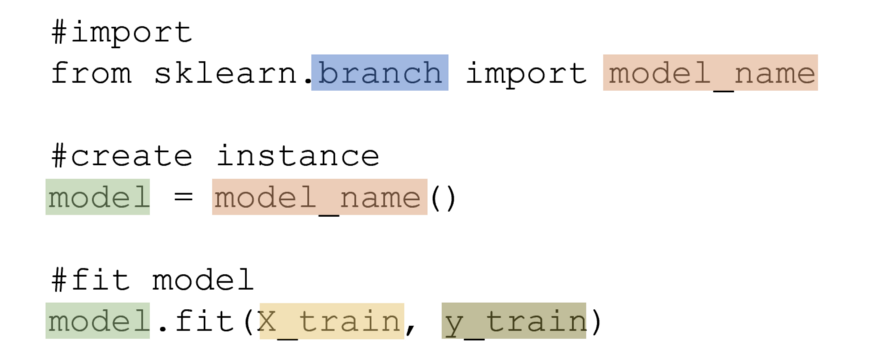

Рассмотрим работу моделей для обучения с учителем и без учителя.

При обучении с учителем модель обучается на размеченном наборе данных и предсказывает ответы, которые используются для оценки точности алгоритма на обучающих данных. 

При обучении без учителя модель использует неразмеченные данные, из которых алгоритм самостоятельно пытается извлечь признаки и зависимости.

### Применение моделей

In [150]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

SEED = 1

svc = SVC(random_state=SEED)

rfc = RandomForestClassifier(random_state=SEED)


In [100]:
from sklearn.model_selection import train_test_split

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED) 

In [115]:
X.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
151    float64
152    float64
153    float64
154    float64
155    float64
Length: 156, dtype: object

In [116]:
numeric_features = list(X_train.dtypes[X_train.dtypes == "float64"].index)
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

## Оценка качества модели

Оценка качества модели выполняется с использованием тестировых выборки. Проеряется насколько точно модели предсказывает результат на тестовых данных, для которых известны правильные метки. Как правило используется модуль `sklearn.metrics` или встроенные методы модели.

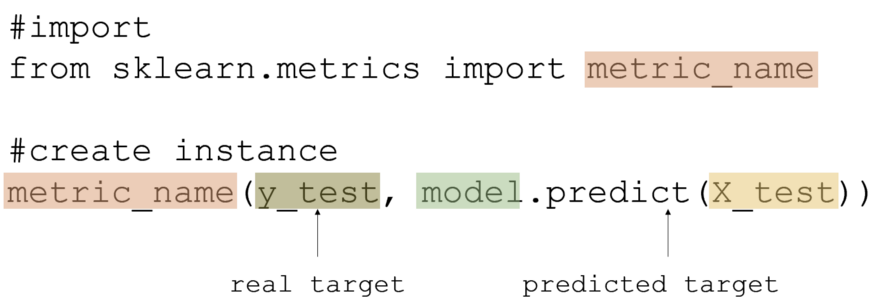

На этот рах воспользуемся трансформером [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Трансформеры в `sklearn` имеют методы `fit` и `transform` (а еще `fit_transform`). Метод `fit` принимает на вход обучающую выборку и считает по ней необходимые значения (например статистики, как `StandardScaler`: среднее и стандартное отклонение каждого из признаков). `transform` применяет преобразование к переданной выборке.

In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report


f1_scorer = make_scorer(f1_score, pos_label=1)


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

svc_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('svc', SVC())
])

rfc_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('rf', RandomForestClassifier())
])


model = svc_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test F1-score = %.2f" % f1_scorer(model, X = X_test, y_true = y_test))
print('______________________')
print('Classification_report:\n', classification_report(y_test, y_pred))

Test F1-score = 0.71
______________________
Classification_report:
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       174
         1.0       0.73      0.69      0.71       121

    accuracy                           0.77       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295



In [164]:
model

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('regression', SVC())])

### Кросс-валидация

Выше мы обучили первую модель и даже посчитали ее качество на отложенной выборке! Давайте теперь посмотрим на то, как можно оценить качество модели с помощью кросс-валидации. Принцип кросс-валидации изображен на рисунке

В основе метода лежит разделение исходного множества данных на k примерно равных блоков, например k=5. Затем на k − 1, т.е. на 4-х блоках, производится обучение модели, а 5-й блок используется для тестирования. Процедура повторяется k раз, при этом на каждом проходе для проверки выбирается новый блок, а обучение производится на оставшихся.


При кросс-валидации мы делим обучающую выборку на $k$ частей (fold). Затем мы обучаем $k$ моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем мы измеряем качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат". После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами $k$ значений.

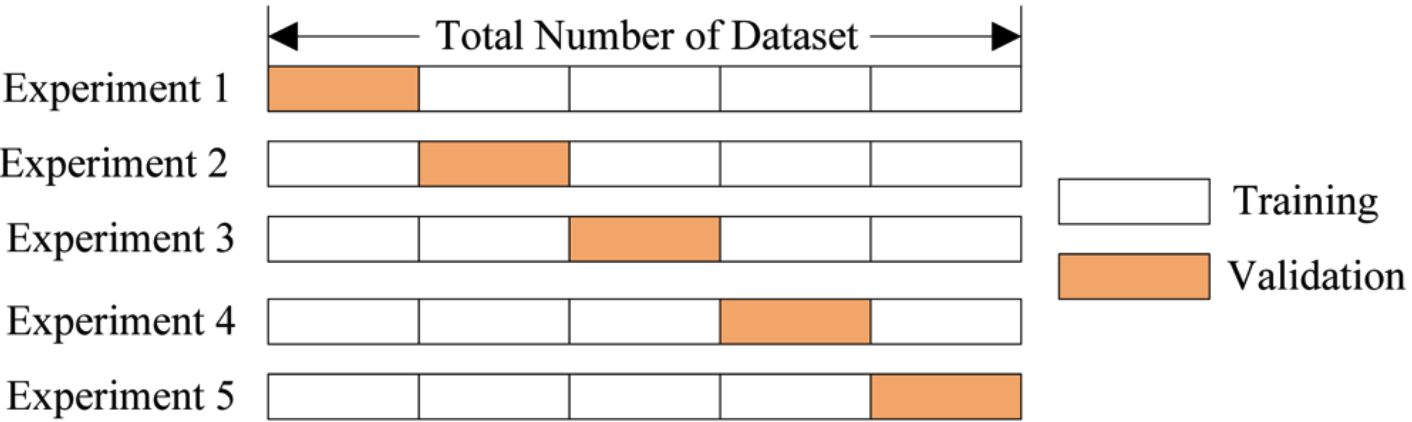

## Оптимизация модели

Поиск правильных значений параметров, которые позволят максимизировать точность прогнозирования модели.

### Grid Search

GridSearch — поиск лучших параметров в фиксированной сетке возможных значений. CV – перекрёстная проверка (кросс-валидация, Cross-validation), метод, который показывает, что модель не переобучилась.

Параметры GridSearchCV:

estimator — модель которую хотим обучать (алгоритм);

param_grid — передаем какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение;

CV — сколько разрезов кросс-валидации мы ходим сделать;

scoring — выбор метрики ошибки (для разных задач можно выбрать разные функции ошибки).

In [170]:
svc_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': ['scale', 'auto', 1e-3, 1e-4, 1e-5], 'svc__C': [0.3, 1, 3, 10, 20, 50]},
                  {'svc__kernel': ['linear'], 'svc__C': [1, 10, 20, 50]},
                  {'svc__kernel': ['poly'], 'svc__gamma': ['scale', 'auto', 1e-3, 1e-4], 'svc__degree': [2, 3, 4, 5]}]

rf_parameters = dict(
    rf__min_samples_leaf=[1, 3, 5, 7],
    rf__n_estimators=[50, 100, 150, 200],
    rf__max_features=['auto', 'log2', None]
)

In [171]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
gs = GridSearchCV(estimator=model, param_grid=svc_parameters, scoring=f1_scorer, cv=skf, verbose=True, error_score= 'raise', n_jobs=-1)
gs.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('ohe_and_scaling',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19,
                                                                          20,
                                                                          21,
                                                                          22,
                                                                          23,
                                                                          24,
                                                                          25,
                                                                          26,
                                                                          27,
                                                                          28,
                                                                          29, ...])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.3, 1, 3, 10, 20, 50],
                          'svc__gamma': ['scale', 'auto', 0.001, 0.0001, 1e-05],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [1, 10, 20, 50], 'svc__kernel': ['linear']},
                         {'svc__degree': [2, 3, 4, 5],
                          'svc__gamma': ['scale', 'auto', 0.001, 0.0001],
                          'svc__kernel': ['poly']}],
             scoring=make_scorer(f1_score, pos_label=1), verbose=True)

In [174]:
gs.best_score_

0.7410651226461911

In [175]:
scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(10)]
print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
       \nbest params = {}'.format(scores,
                                  gs.cv_results_['mean_test_score'][gs.best_index_],
                                  gs.cv_results_['std_test_score'][gs.best_index_],
                                  gs.best_params_))

scores = [0.65625, 0.7419354838709677, 0.71875, 0.8615384615384616, 0.7272727272727272, 0.7540983606557378, 0.6865671641791046, 0.735294117647059, 0.7936507936507937, 0.7352941176470589], 
mean score = 0.74107 +/- 0.05326        
best params = {'svc__C': 50, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}


In [194]:
best_model = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer), \
                     ('svc', SVC(kernel='rbf', C=50, gamma='auto', random_state=SEED, probability=True))]) 

In [221]:
res = cross_val_score(best_model, X, y, cv=skf, scoring='precision')

print(res)
print("Precision-score with the best model = %.5f" % res.mean())

[0.72413793 0.82142857 0.76666667 0.90322581 0.75       0.85185185
 0.6969697  0.73529412 0.86206897 0.75757576]
Precision-score with the best model = 0.78692


In [187]:
res = cross_val_score(best_model, X, y, cv=skf, scoring=f1_scorer)

print(res)
print("F1-score with the best model = %.5f" % res.mean())

[0.65625    0.74193548 0.71875    0.86153846 0.72727273 0.75409836
 0.68656716 0.73529412 0.79365079 0.73529412]
F1-score with the best model = 0.74107


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, make_scorer

def grid_search(model, gs_params, upsampling: bool, seed: int = 1):
    '''Функция для подбора гиперпараметров на кроссвалидации'''
    np.random.seed(seed)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#     if upsampling:
#         skf = KFoldWithUpsampling(skf)
    f1_scorer = make_scorer(f1_score, pos_label=1)
    gs = GridSearchCV(estimator=model, param_grid=gs_params, scoring=f1_scorer, cv=skf, verbose=True, error_score= 'raise')
    gs.fit(X, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(10)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    
    return gs

In [ ]:
print('grid search results for svc')
rf_grid = grid_search(model=model, gs_params=svc_parameters, seed=SEED)

In [188]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))

In [211]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

skf = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
f1_scores = []
precision_scores = []
recall_scores = []
TP_list = []
FN_list =  []
FP_list = []
TN_list = []
specificity_scores = []
auc_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = best_model.fit(X_train, y_train).predict(X_test)
    TP = find_TP(y_test,y_pred)
    FN = find_FN(y_test,y_pred)
    FP = find_FP(y_test,y_pred)
    TN = find_TN(y_test,y_pred)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    TP_list.append(TP)
    FN_list.append(FN)
    FP_list.append(FP)
    TN_list.append(TN)
    f1_scores.append(f1_score(y_test, y_pred))
    specificity_scores.append(TN/(TN + FP))
    y_pred_proba = best_model.predict_proba(X_test)[::,1]
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred_proba))
print(f"common(sum) confusion_matrix: \n {np.array([[sum(TN_list),sum(FP_list)],[sum(FN_list),sum(TP_list)]])}")
# print(f"common(average) confusion_matrix: \n {np.array([[np.mean(TN_list),np.mean(FP_list)],[np.mean(FN_list),np.mean(TP_list)]])}")
#print(precision_scores)
print("Precision: %0.3f (+/- %0.3f)" % (np.mean(precision_scores), np.std(precision_scores)))
# print(f1_scores)
print("F1: %0.3f (+/- %0.3f)" % (np.mean(f1_scores), np.std(f1_scores)))
# print(recall_scores)
print("Sensitivity/Recall: %0.3f (+/- %0.3f)" % (np.mean(recall_scores), np.std(recall_scores)))
# print(specificity_scores)
print("Specificity: %0.3f (+/- %0.3f)" % (np.mean(specificity_scores), np.std(specificity_scores)))
# print(auc_scores)
print("AUC: %0.3f (+/- %0.3f)" % (np.mean(auc_scores), np.std(auc_scores)))

common(sum) confusion_matrix: 
 [[483  66]
 [102 240]]
Precision: 0.787 (+/- 0.065)
F1: 0.741 (+/- 0.053)
Sensitivity/Recall: 0.702 (+/- 0.055)
Specificity: 0.880 (+/- 0.042)
AUC: 0.838 (+/- 0.051)


In [222]:
f1_scores

[0.65625,
 0.7419354838709677,
 0.71875,
 0.8615384615384616,
 0.7272727272727272,
 0.7540983606557378,
 0.6865671641791046,
 0.735294117647059,
 0.7936507936507937,
 0.7352941176470589]

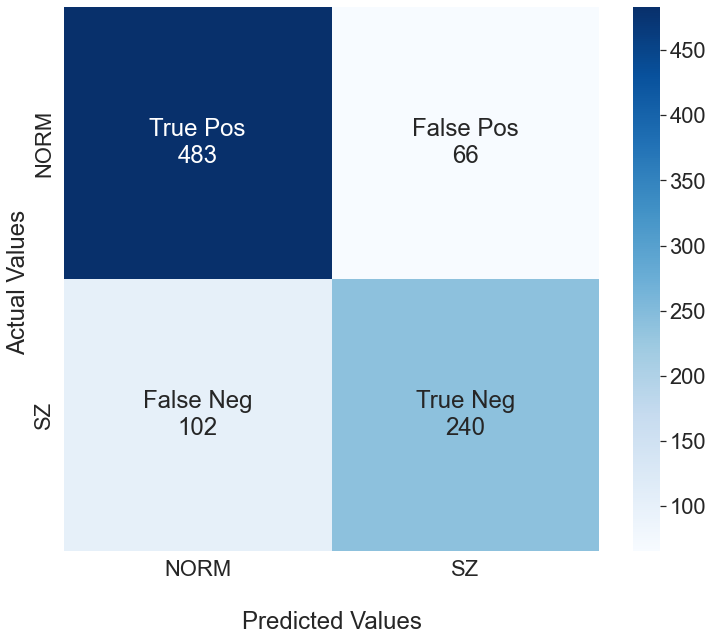

In [224]:
from matplotlib import rcParams
import seaborn as sns

data = np.asarray([[sum(TN_list),sum(FP_list)],[sum(FN_list),sum(TP_list)]])
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                data.flatten()]
data2 = np.asarray([[np.mean(TN_list),np.mean(FP_list)],[np.mean(FN_list),np.mean(TP_list)]])

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(data, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NORM','SZ'])
ax.yaxis.set_ticklabels(['NORM','SZ'])

## Display the visualization of the Confusion Matrix.

# figure size in inches
rcParams['figure.figsize'] = 12, 10
sns.set(font_scale=2) 
plt.show()

## Сохранение и загрузка модели

In [ ]:
txt



In [215]:
# с помощью модуля pickle
import pickle # feather


# save
with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


In [ ]:
# с помощью joblib
import joblib


# save
joblib.dump(clf, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")

clf2.predict(X[0:1])